streamlitチュートリアル_インタラクティブな企業分析アプリを作ろう、1.概要

ソースコード及びデータはこちらから入手できます。

https://github.com/lightondust/streamlit_tutorial_finteract

# streamlit概要

データ分析した結果などを手軽にWebアプリにできるツールです。

ドロップダウンメニューやラジオボタン、テキストエリアなどのユーザ入力を手軽に変数へ格納し、それを元にデータを可視化したりできます。

表示に関しては

- 既存描画コードを流用できる（plotly、bokeh、matplotlib）
- 地図上での表示なども簡単にできる
- マークダウンで表示を調整できる（画像やリンクなどもOK）

ができて、jupyter notebookで行った解析を少ない工数でアプリにできるのが魅力です。

分析サイドで解析をすばやくアプリにして、ビジネスサイドがそれと向き合いならが価値を引き出したり、分析へフィードバックしたりするサイクルを高速にローコストで実現できるようになるため、企業とデータの関わり方が劇的に変わる可能性もあると感じています。

少し高度な機能としては

- マークダウンでは不十分な時はjs含めてのhtmlを挿入できる
- オリジナルstreamlit部品を作るができて、それ用のチュートリアルがある
- プレースホルダーを使うとユーザの動作に応じてある程度柔軟な動きができる

ができるため、ある程度高度な機能も簡単に実現できます。

また、基本的にpythonのコードを自由に実行できるので、
- databaseと連携して膨大なデータを扱ったり、ユーザアクションを蓄積していくことができる
毎度同じ動作をする関数に関しては
- cache機能を使って、データ読み込みなど一度だけ実行するようにできる

ただ、本格的なウェブアプリ用のライブラリではないため、ヘッダーやクッキーの扱いなどは自由にできません。

- 認証は現状頑張ればできる（デフォルトの機能はない）が、細かい制御が難しい（今後しやすくなる見込み）
- URLの書き換えは実験的な機能として実装されている
- CORS関連（例えばサイト内にTweetなどを埋め込みたい場合）はバージョンによってできたりできなかったり

# 具体的に見てみよう

## データ表示

データを読み込んで画面上に表示してみます。ノートブックでは次のように書きます

In [43]:
import os
import pandas as pd

In [44]:
def read_company_info():
    company_info_path = os.path.join('.','data', 'tse_company_info.csv')
    df = pd.read_csv(company_info_path, index_col=0)
    return df 

In [45]:
company_info_df = read_company_info()

In [46]:
comany_info_df.head()

,code,時価総額,セクター_en,従業員数,PBR,総収入,純利益,年,名前,セクター,address,lon,lat
0,1301,2.993377e+10,Consumer Defensive,2307.0,0.855780,2.625190e+11,2.037000e+09,2020.0,極洋,食品,〒107-0052 東京都港区赤坂３−３−５,35.671513,139.741379
12,1332,1.272567e+11,Consumer Defensive,9247.0,0.801719,6.900160e+11,1.476800e+10,2020.0,日本水産,食品,〒105-8676 東京都港区西新橋１−３−１,35.665021,139.760798
13,1333,1.120904e+11,Consumer Defensive,11107.0,0.817978,9.052040e+11,1.253700e+10,2020.0,マルハニチロ,食品,〒135-8608 東京都江東区豊洲３−２−２０ 豊洲フロント,35.653641,139.798843
19,1352,8.281886e+09,Consumer Defensive,404.0,1.271149,8.049200e+10,4.540000e+08,2020.0,ホウスイ,食品,〒135-0061 東京都江東区豊洲６−６−３,35.638515,139.785476
30,1375,7.252700e+10,Consumer Defensive,NaN,10.541741,NaN,NaN,NaN,雪国まいたけ,食品,〒949-6695 新潟県南魚沼市余川８９,37.075239,138.878115


このデータの中には東証に上場している企業３６００社の時価総額、総収入、純利益、従業員数、PBR、セクター、住所、座標などが入っています。

streamlitで上記のノートブック用のコードを少し変更するだけで画面上にデータをレンダリングすることができます

```
import os
import pandas as pd
import streamlit as st

def read_company_info():
    company_info_path = os.path.join('.','data', 'tse_company_info.csv')
    df = pd.read_csv(company_info_path, index_col=0)
    return df 

company_info_df = read_company_info()

"""
# データ表示
"""

company_info_df
```

```
import os
import pandas as pd
import streamlit as st

def read_company_info():
    company_info_path = os.path.join('.','data', 'tse_company_info.csv')
    df = pd.read_csv(company_info_path, index_col=0)
    return df 

company_info_df = read_company_info()

company_info_df
```

ここで
```
company_info_df
```
と書くだけでデータフレームが画面にレンダリングされます。
便利な機能ですが、明示していない分わかりにくいと感じるかもしれません。
これはstreamlitのマジックコマンドと呼ばれる機能で、中では
```
st.dataframe(company_info_df)
```
を呼び出しています。

同様に
```
"""
# データ表示
"""
```
は
```
st.markdown('''
# データ表示
''')
```
を実行しています。

次のように明示的に書いても同じ動作をします。

```
import os
import pandas as pd
import streamlit as st

def read_company_info():
    company_info_path = os.path.join('.','data', 'tse_company_info.csv')
    df = pd.read_csv(company_info_path, index_col=0)
    return df 

company_info_df = read_company_info()

st.markdown('''
# データ表示
''')
st.dataframe(company_info_df)
```

## 時価総額

次にグラフを描画して画面上に表示してます。

In [48]:
import plotly.express as px

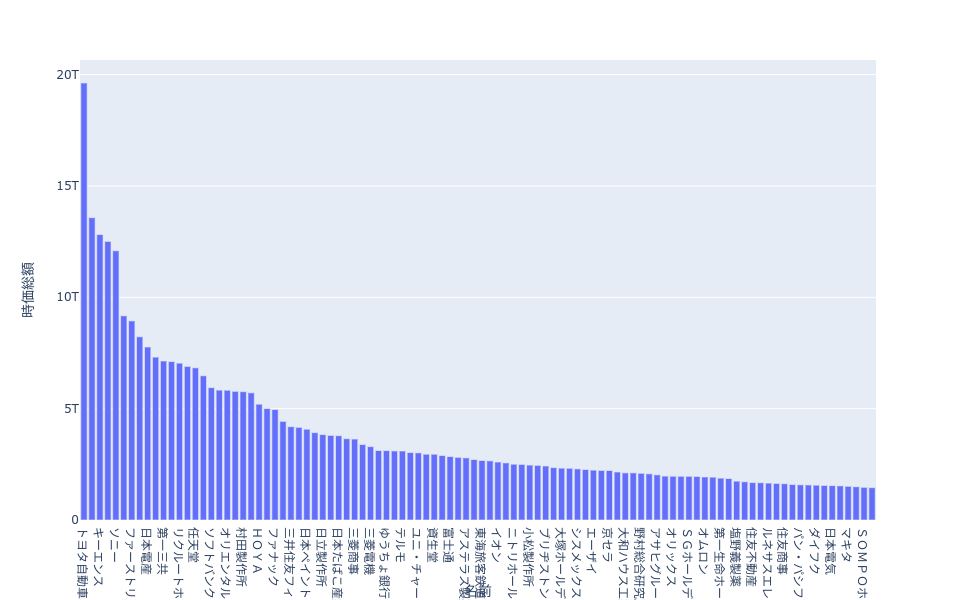

In [49]:
fig = px.bar(company_info_df.sort_values('時価総額', ascending=False).iloc[:100], x='名前', y='時価総額')
fig.show()

## セクター別時価総額

In [50]:
ct_df = company_info_df['セクター'].value_counts()

In [33]:
ct_df.shape

(60,)

In [39]:
type(ct_df)

pandas.core.series.Series

In [41]:
ct_df.reset_index(name='name')

,index,name
0,他産業サービス・製品,239
1,電子部品・産業用電子機器,238
2,ＳＩ・ソフトウェア開発,201
3,食品,157
4,化学,157
5,外食・娯楽サービス,153
6,産業機械,133
7,ヘルスケア製品・サービス,129
8,自動車部品,121
9,メディア,117


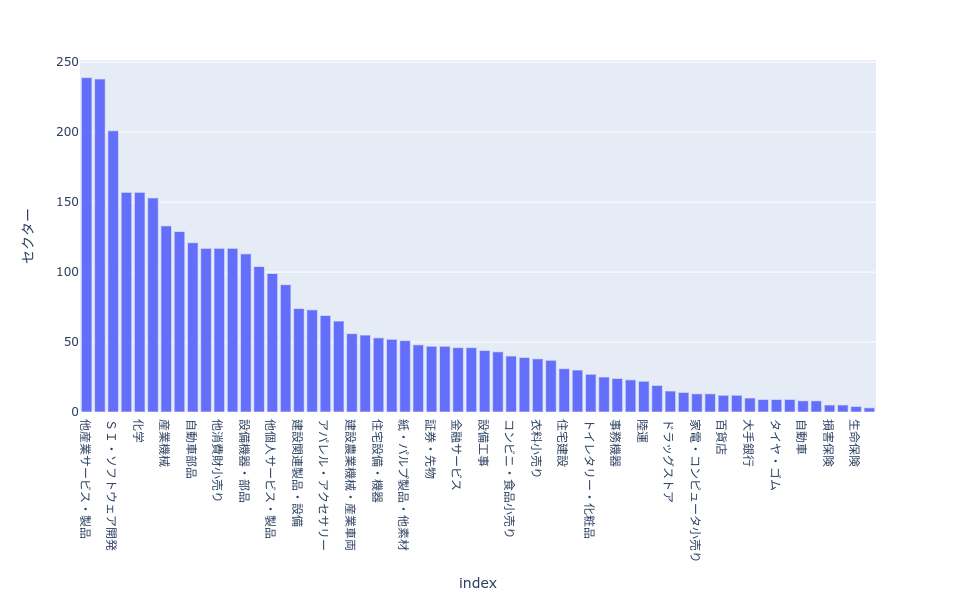

In [42]:
# fig = px.bar(comany_info_df['セクター'].value_counts(), x='index')
fig = px.bar(ct_df.reset_index(), x='index', y='セクター')
fig.show()